### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

### Importing the tweets of government officials in the past one year

In [2]:
presidents_tweets = pd.read_csv('tweets_of_presidents_one_year.csv')
presidents_tweets

,Created_date,Favorite_count,Hashtags,Retweet_count,Source,Tweet,Tweet_ID,User_Mentions,User_Name
0,2020-07-15 16:52:14,28,"[{'text': 'COVID19', 'indices': [57, 65]}]",13,Twitter for Android,"b""Ministerial Statement: Minister of Health Li...",1283444273149620224,[],@EswatiniGovern1
1,2020-07-15 09:28:11,9,[],2,Twitter Web App,b'Ambassador Aragones: \xe2\x80\x9cWhen this p...,1283332522777157632,[],@EswatiniGovern1
2,2020-07-15 09:28:10,11,"[{'text': 'COVID19', 'indices': [95, 103]}]",2,Twitter Web App,b'Ambassador Aragones: \xe2\x80\x9cThis assist...,1283332518964600839,[],@EswatiniGovern1
3,2020-07-15 09:28:09,3,[],0,Twitter Web App,b'PM: \xe2\x80\x9cThis support is significant ...,1283332516586422273,[],@EswatiniGovern1
4,2020-07-15 09:28:08,4,[],0,Twitter Web App,b'Prime Minister: \xe2\x80\x9cThe EU is showin...,1283332512966680578,[],@EswatiniGovern1
...,...,...,...,...,...,...,...,...,...
23089,2020-03-28 17:51:05,13,[],10,Twitter Web App,b'Pour toute information sur coronavirus consu...,1243958803453878273,[],@MSPS_Togo
23090,2020-03-23 10:40:49,47,[],16,Twitter Web App,b'Le premier cas confirm\xc3\xa9 de coronaviru...,1242038584112185344,[],@MSPS_Togo
23091,2020-03-17 11:50:11,2,[],0,Twitter Web App,b'https://t.co/QhnGix1V7f',1239881713922211840,[],@MSPS_Togo
23092,2020-03-17 11:48:52,25,[],17,Twitter Web App,b'Manifestations coronavirus https://t.co/mdjy...,1239881384732344325,[],@MSPS_Togo


In [3]:
popularity = presidents_tweets[['User_Name','Favorite_count', 'Retweet_count']]
popular = popularity.groupby('User_Name', as_index=False)
popular

### Calculating the popularity score

In [5]:
new_popular = popular.agg(np.sum)
new_popular['popularity_score'] = new_popular['Favorite_count'] + new_popular['Retweet_count'] 
new_popular = new_popular.sort_values('popularity_score', ascending=False).reset_index(drop=True)
new_popular

,User_Name,Favorite_count,Retweet_count,popularity_score
0,@MBuhari,1821119,489610,2310729
1,@SudanPMHamdok,1100303,238129,1338432
2,@KagutaMuseveni,1036126,185353,1221479
3,@NAkufoAddo,796905,138124,935029
4,@Macky_Sall,493056,80919,573975
5,@PresidencyZA,366911,181228,548139
6,@Presidence_RDC,446240,66825,513065
7,@StateHouseKenya,355183,90055,445238
8,@AOuattara_PRCI,287409,47985,335394
9,@PaulKagame,256174,57242,313416


### Chart showing the top 10 popular officials

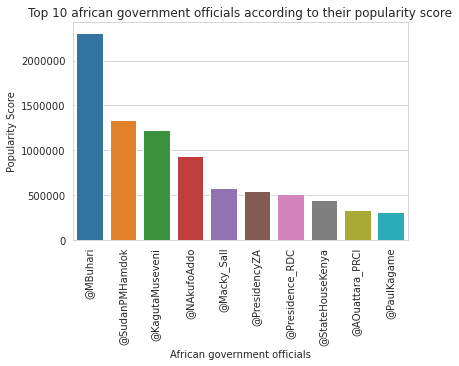

In [6]:
top_10_presidents_popular = new_popular[:10]
top_10_presidents_popular
with sns.axes_style("whitegrid"):
    ax = sns.barplot(x='User_Name', y='popularity_score', data=top_10_presidents_popular)
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.xticks(rotation=90)
plt.title('Top 10 african government officials according to their popularity score')
plt.xlabel('African government officials')
plt.ylabel('Popularity Score')
plt.savefig('popularity_score.png', bbox_inches="tight", dpi=300)

### Importing the tweets of the influencers for the past one year

In [7]:
influencers_tweets = pd.read_csv('tweets_of_influencers_one_year.csv')
influencers_tweets

,Created_date,Favorite_count,Hashtags,Retweet_count,Source,Tweet,Tweet_ID,User_Mentions,User_Name
0,2020-07-13 19:41:02,20649,[],2730,TweetDeck,b'Actual video footage of me starting off the ...,1282761976343662593,[],@Trevornoah
1,2020-07-11 22:07:04,0,[],92777,Twitter Web App,b'RT @KingBach: https://t.co/Sj2sVP7Gdt',1282073950843858944,"[{'screen_name': 'KingBach', 'name': 'King Bac...",@Trevornoah
2,2020-07-07 14:50:30,43315,[],5993,Twitter Web App,b'When white people take \xe2\x80\x9cbeing an ...,1280514534155923459,[],@Trevornoah
3,2020-07-06 21:54:14,14650,[],1635,Twitter Web App,b'Me at the restaurant after things return to ...,1280258784485572611,[],@Trevornoah
4,2020-06-26 17:02:37,0,[],403,Twitter for iPhone,b'RT @franklinleonard: \xe2\x80\x9cI have rape...,1276561514456113152,"[{'screen_name': 'franklinleonard', 'name': 'F...",@Trevornoah
...,...,...,...,...,...,...,...,...,...
123605,2019-07-14 15:36:11,5,[],0,Twitter Web Client,b'\xe2\x80\x9cI don\xe2\x80\x99t know why I\xe...,1150428788989161472,[],@gettleman
123606,2019-07-14 03:26:42,0,[],26,Twitter for iPhone,b'RT @scroll_in: Elephants in India are changi...,1150245206135984128,"[{'screen_name': 'scroll_in', 'name': 'scroll....",@gettleman
123607,2019-07-11 02:53:05,4,[],0,Twitter Web Client,b'we should ALL do more burpees. https://t.co/...,1149149581801693185,[],@gettleman
123608,2019-07-11 02:52:19,0,[],23,Twitter Web Client,b'RT @halbfinger: Liberal U.S. Jews complain t...,1149149391145451520,"[{'screen_name': 'halbfinger', 'name': 'David ...",@gettleman


### Calculating the popularity score for the influencers

In [8]:
popular_influence = influencers_tweets[['User_Name','Favorite_count', 'Retweet_count']]
popularity = popular_influence.groupby('User_Name', as_index=False)
popularity

In [10]:
new_popular_influencers = popularity.agg(np.sum)
new_popular_influencers['popularity_score'] = new_popular_influencers['Favorite_count'] + new_popular_influencers['Retweet_count'] 
new_popular_influencers = new_popular_influencers.sort_values('popularity_score', ascending=False).reset_index(drop=True)
new_popular_influencers

,User_Name,Favorite_count,Retweet_count,popularity_score
0,@malonebarry,339494,10828425,11167919
1,@MbuyiseniNdlozi,1160597,9018169,10178766
2,@Trevornoah,2365051,6541053,8906104
3,@Julius_S_Malema,1229048,5297624,6526672
4,@andiMakinana,71583,2539312,2610895
...,...,...,...,...
76,@KahnMorbee,502,152,654
77,@Entrepreneur_SA,33,231,264
78,@jaxpanik,17,144,161
79,@InvestInAfrica,26,28,54


### Chart showing the top 10 influencers by popularity score

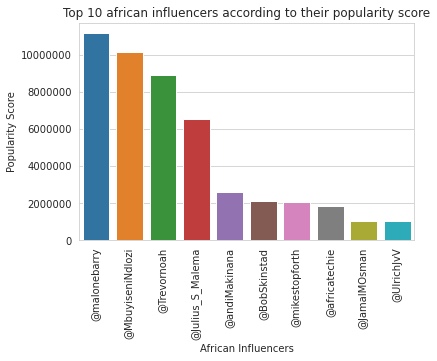

In [11]:
top_10_influencers_popular = new_popular_influencers[:10]
top_10_influencers_popular
with sns.axes_style("whitegrid"):
    ax = sns.barplot(x='User_Name', y='popularity_score', data=top_10_influencers_popular)
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.xticks(rotation=90)
plt.title('Top 10 african influencers according to their popularity score')
plt.xlabel('African Influencers')
plt.ylabel('Popularity Score')
plt.savefig('popularity_score_influencers.png', bbox_inches="tight", dpi=300)